In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import matplotlib.pyplot as plt


In [6]:
import tensorflow as tf
import os
import numpy as np

In [7]:
base_dir=r"/content/drive/MyDrive/Training Data"
#"E:\Study DS\dogs-vs-cats\train"

In [8]:
IMAGE_SIZE=224
BATCH_SIZE=128

# for training
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    
    
    rescale=1./255,   #normaliztion
    zoom_range=0.2,   #augmentation
    horizontal_flip=True,  #augmentation
    validation_split=0.1)


# for testing
validation_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,   #normaliztion
    
    validation_split=0.1
)

In [9]:
train_genarator=train_datagen.flow_from_directory(
    base_dir,    # path 
    target_size=(IMAGE_SIZE,IMAGE_SIZE),   #size 224*244 
    batch_size=BATCH_SIZE,                 # batch size
    subset='training'                        # for trainign
    

) 

validation_generator=validation_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),     #size 224*244 
    batch_size=BATCH_SIZE,                   # batch size
    subset='validation'                     # for testing
     

) 

Found 83 images belonging to 4 classes.
Found 7 images belonging to 4 classes.


In [10]:
from tensorflow.keras.layers import Input,Flatten,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from glob import glob

In [11]:
IMAGE_SIZE=[224,224]
vgg=VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)   #image size 224*244*  and the 3 is 3 channel RGB and weight are similar to to imagenet dataset pre trained
vgg.output               # downloading the model

58889256/58889256 [==============================] - 1s 0us/step


<KerasTensor: shape=(None, 7, 7, 512) dtype=float32 (created by layer 'block5_pool')>

In [12]:
#Now when you set the trainable property of a model as False it would skip the weight update step.

for layer in vgg.layers:
    layer.trainable=False

In [ ]:
folders=4

In [13]:
x=Flatten()(vgg.output)
prediction=Dense(4,activation='softmax')(x)
model=Model(inputs=vgg.input,outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
epoch=5

history=model.fit(train_genarator,
                  steps_per_epoch=len(train_genarator),
                  epochs=epoch,
                  validation_data=validation_generator,
                  validation_steps=len(validation_generator)
                 )

Epoch 1/5
1/1 [==============================] - 57s 57s/step - loss: 1.7571 - accuracy: 0.1325 - val_loss: 3.4049 - val_accuracy: 0.2857
Epoch 2/5
1/1 [==============================] - 58s 58s/step - loss: 2.8076 - accuracy: 0.3614 - val_loss: 2.8748 - val_accuracy: 0.2857
Epoch 3/5
1/1 [==============================] - 58s 58s/step - loss: 2.1447 - accuracy: 0.3735 - val_loss: 1.4169 - val_accuracy: 0.2857
Epoch 4/5
1/1 [==============================] - 61s 61s/step - loss: 0.9329 - accuracy: 0.6506 - val_loss: 1.6194 - val_accuracy: 0.5714
Epoch 5/5
1/1 [==============================] - 59s 59s/step - loss: 1.2878 - accuracy: 0.4458 - val_loss: 1.8520 - val_accuracy: 0.5714


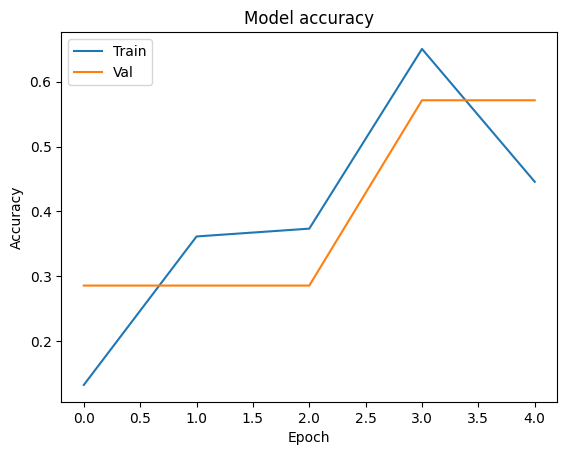

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

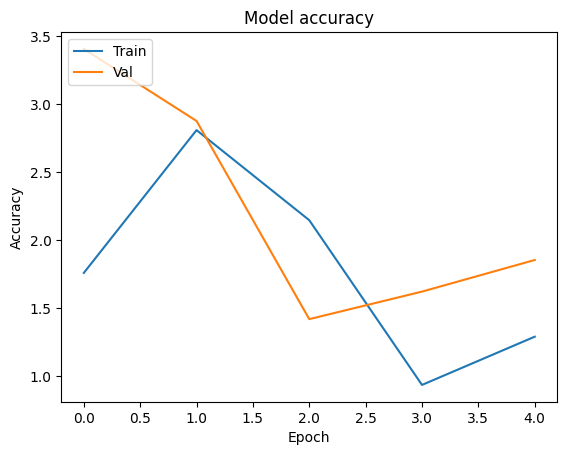

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [19]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

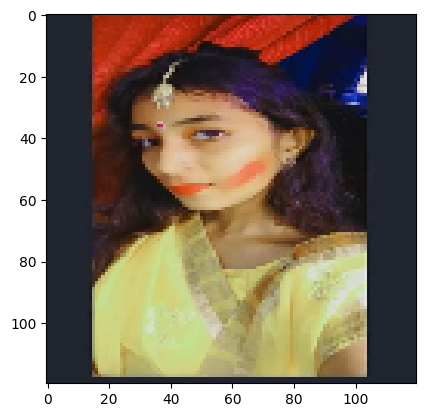

In [20]:
# load the image
img = load_img(r"/WhatsApp Image 2023-05-22 at 11.04.19.jpeg", target_size=(120,120))

# convert to array
img = img_to_array(img)

# center pixel data
img = img / 255.0

# show the image
plt.imshow(np.uint8(img*255))
plt.show()

In [24]:
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
from keras.preprocessing import image
import keras.utils as image
import numpy as np
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the image
img_pred = image.load_img(r"/WhatsApp Image 2023-05-22 at 11.04.19.jpeg", target_size=(224, 224))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis=0)

# Make the prediction
rslt = model.predict(img_pred)

# Get the predicted class label
class_labels = ['Priyanka', 'Ratnesh', 'Saloni', 'Shivani']  # Update with your actual class labels
prediction = class_labels[np.argmax(rslt)]

# Print the prediction
print(prediction)


1/1 [==============================] - 1s 541ms/step
Shivani


In [26]:
# Load the image
img_pred = image.load_img(r"/346155158_703762441753020_4651629585161000147_n.jpg", target_size=(224, 224))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis=0)

# Make the prediction
rslt = model.predict(img_pred)

# Get the predicted class label
class_labels = ['Ratnesh', 'Priyanka', 'Saloni', 'Shivani']  # Update with your actual class labels
prediction = class_labels[np.argmax(rslt)]

# Print the prediction
print(prediction)


1/1 [==============================] - 1s 700ms/step
Priyanka


In [29]:
# Save the entire model to a file
model.save('my_frnds.h5')

'''
Saving the model:
You can save the model and its architecture by calling the save() method on the trained model object. 
This method saves the entire model (architecture, weights, and optimizer state) to a file in the specified format.
'''

'\nSaving the model:\nYou can save the model and its architecture by calling the save() method on the trained model object. \nThis method saves the entire model (architecture, weights, and optimizer state) to a file in the specified format.\n'

In [30]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('my_frnds.h5')


In [31]:
#Intern at Pranathi
#Student of DataTrained - Saurav
#Date -> 22-05-2023 
#Time -> 11:49 AM